# Perceptron Learning Algorithm

### 1 - original format of algorithm

In [1]:
import numpy as np

class Perceptron_origin():
    
    def __init__(self, learning_rate=0.01): 
        """
        Initialize the parameters of perceptron model
        
        Argument:
        learning_rate -- learning rate of the gradient descent update rule
        """
        # initialihe basic parameter
        self.learning_rate = learning_rate

    
    def fit(self, x_train, y_train, num_iterations=1000):
        """
        Predict class labels for samples in X
        
        Arguments:
        x_train -- {array-like, sparse matrix}, shape = [n_samples, n_features]
        y_train -- {array-like}, shape = [n_samples, 1]
        num_iterations -- number of iterations of the optimization loop
            
        Returns:
        End -- has calculated parameters w and b successfully.
        """
        # get shape of space of feature-vector
        num_x = np.shape(x_train)[0]
        dim_x = np.shape(x_train)[1]
        
        # initialize weights and bias
        self.w = np.zeros(dim_x)
        self.b = 0
        
        # go into loops for optimazation 
        while num_iterations:
            # pick a point randomly
            i = np.random.randint(0, num_x)
            x = x_train[i]
            y = y_train[i]
            # predict the instance by current model
            y_hat = self.predict(x)
            # if the prediction is wrong, then implement gradient descent  
            if y*y_hat <= 0:
                self.w += self.learning_rate * y * x
                self.b += self.learning_rate * y
                
            # loops for iterations minus 1
            num_iterations -= 1
            

    def sign(self, x):
        """
        Sign function that if x>=0 return +1, if x<0 return -1 
    
        Argument:
        x -- input value, type = np.float64 
    
        Returns:
        sign of input value, which represents the positive by +1 and the negative by -1
        """
        # judge whether the input is positive
        if x >= 0:
            return +1
        else:
            return -1
        
        
    def predict(self, x):
        """
        Infer the result of model by given x
    
        Argument:
        x -- feature vector of an instance, shape = [1, n_features]
    
        Returns:
        Inference result of the given instance,type = np.float64
        """
        # calculate the dot production of weights and feature-vector, finally plus the bias
        y =np.dot(x, self.w) + self.b
        
        return self.sign(y)
    

### 2 - dual format of algorithm

In [13]:
import numpy as np

class Perceptron_dual():
    
    def __init__(self, learning_rate=0.01): 
        """
        Initialize the parameters of perceptron model
        
        Argument:
        learning_rate -- learning rate of the gradient descent update rule
        """
        # initialihe basic parameter
        self.learning_rate = learning_rate
        
    
    def fit(self, x_train, y_train, num_iterations=1000):
        """
        Predict class labels for samples in X
        
        Arguments:
        x_train -- {array-like, sparse matrix}, shape = [n_samples, n_features]
        y_train -- {array-like}, shape = [n_samples, 1]
        num_iterations -- number of iterations of the optimization loop
            
        Returns:
        End -- has calculated parameters w and b successfully.
        """
        # add training data into class attributes
        self.x = x_train
        self.y = y_train
        
        # get shape of space of feature-vector
        num_x = np.shape(self.x)[0]
        dim_x = np.shape(self.x)[1]
        
        # calculate the Gram matrix
        self.gram = np.zeros([num_x, num_x])
        for i in range(num_x):
            for j in range(num_x):
                self.gram[i,j] = np.dot(self.x[i], self.x[j])
        
        # initialize alpha-array and bias
        self.alpha = np.zeros(num_x)
        self.b = 0
        
        # go into loops for optimazation 
        while num_iterations:
            # pick the index of an instance randomly
            i = np.random.randint(0, num_x)
            # predict the instance by current model
            y_hat = self.decision_func(i)
            # if the prediction is wrong, then implement gradient descent
            if self.y[i]*y_hat <= 0:
                self.alpha[i] += self.learning_rate
                self.b += self.learning_rate * self.y[i]
            
            # loops for iterations minus 1
            num_iterations -= 1
        
        # calculate the final combination of weights
        self.w = np.dot(self.alpha*self.y, self.x)
    
    def sign(self, x):
        """
        Sign function that if x>=0 return +1, if x<0 return -1 
    
        Argument:
        x -- input value, type = np.float64 
    
        Returns:
        sign of input value, which represents the positive by +1 and the negative by -1
        """
        # judge whether the input is positive
        if x >= 0:
            return +1
        else:
            return -1
        
        
    def decision_func(self, i):
        """
        Infer the result of model under in training 
    
        Argument:
        i -- the index of picked instance of feature-vector
    
        Returns:
        Inference result of the given instance,type = np.float64
        """
        # use gram matrix to calculate current weights and bias
        wx = 0
        for j in range(len(self.y)):
            wx_j = self.alpha[j] * self.y[j] * self.gram[j,i]
            wx += wx_j
        # calculate wx+b
        y = wx + self.b
        
        return self.sign(y)
    
    
    def predict(self, x):
        """
        Infer the result of model by given x with unknown y
    
        Argument:
        x -- feature vector of an instance, shape = [1, n_features]
    
        Returns:
        Inference result of the given instance,type = np.float64
        """
        # calculate wx+b
        y = np.dot(self.w, x) + self.b
        
        return self.sign(y)
    

### Test

In [14]:
from matplotlib import pyplot as plt

%matplotlib inline

#### generate artificial samples

In [15]:
x = np.array([[3,3], [4,3], [1,2.5], [0.5,0.5], [2,2], [1,5], [2.5,1.5], [3.5,2.5], [1.5,3], [1.5,2], [1.0,4.5], [2,4.5], [3,4.5],
              [0.7,3.7], [3,2]])
y = np.array([1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1,-1, -1 ])

#### training model and visualization

- original model

In [54]:
model_1 = Perceptron_origin(learning_rate=0.01)
model_1.fit(x,y, num_iterations=10000)

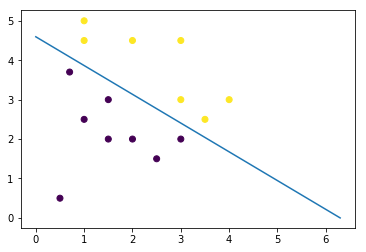

In [55]:
# 计算超平面与坐标轴的交点
x1_1 = - model_1.b / model_1.w[0]
x2_1 = - model_1.b / model_1.w[1]
# 可视化超平面与训练数据的关系
fig_1 = plt.scatter(x[:,0], x[:,1], c=y)
fig_1 = plt.plot([0,x1_1], [x2_1,0])

- dual model

In [64]:
model_2 = Perceptron_dual(learning_rate=0.01)
model_2.fit(x,y,num_iterations=10000)

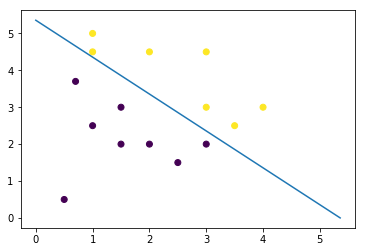

In [65]:
x1_2 = - model_2.b / model_2.w[0]
x2_2 = - model_2.b / model_2.w[1]
# 可视化超平面与训练数据的关系
fig_2 = plt.scatter(x[:,0], x[:,1], c=y)
fig_2 = plt.plot([0,x2_2], [x2_2,0])